### Import dependencies

In [83]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

### Read DataFrame

In [84]:
DATA_PATH = os.path.join("data", "tripadvisor_hotel_reviews.csv")

df = pd.read_csv(DATA_PATH)

print("# DataFrame shape:", df.shape)

# DataFrame shape: (20491, 2)


### Clean DataFrame

In [85]:
def clean_data(df):
    df = df.dropna()
    df = df.drop_duplicates()
    return df

df = clean_data(df)

print("# DataFrame shape after cleaning:", df.shape)

# DataFrame shape after cleaning: (20491, 2)


### Rename columns

In [86]:
df = df.rename(columns={"Review": "text", "Rating": "label"})

### Train/Test/Val split

In [87]:
train_df, test_df = train_test_split(df, test_size=0.15, random_state=42)
train_df, val_df = train_test_split(train_df, test_size=0.05, random_state=42)

print("# Train DataFrame shape:", train_df.shape)
print("# Test DataFrame shape:", test_df.shape)
print("# Validation DataFrame shape:", val_df.shape)

# Train DataFrame shape: (16546, 2)
# Test DataFrame shape: (3074, 2)
# Validation DataFrame shape: (871, 2)


### Labels distribution

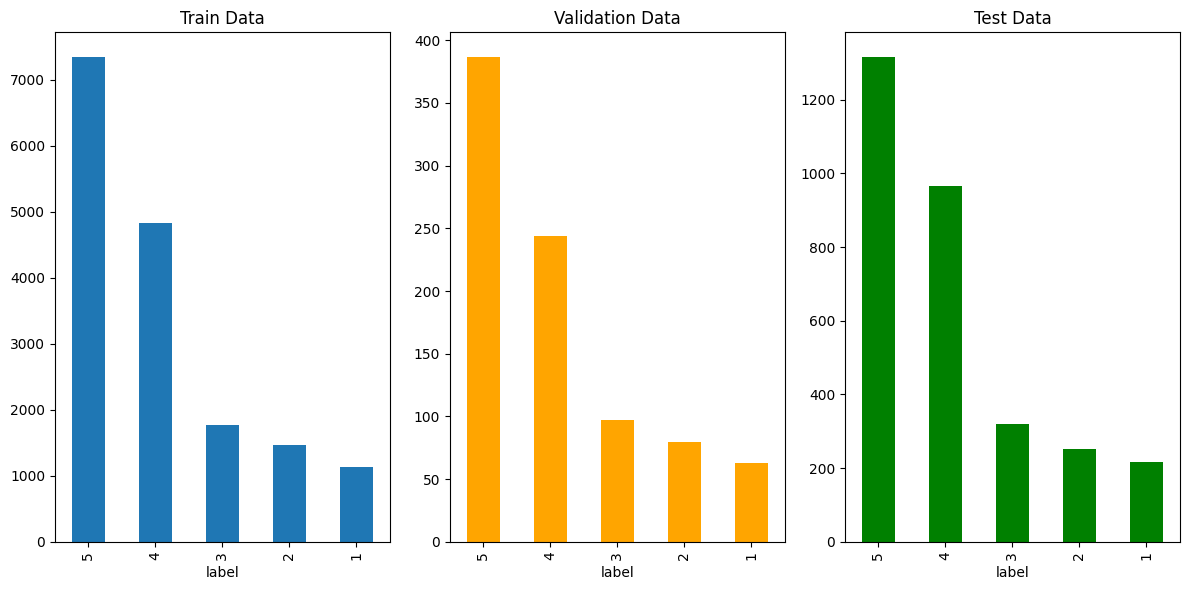

In [88]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
train_df["label"].value_counts().plot(kind="bar")
plt.title("Train Data")

plt.subplot(1, 3, 2)
val_df["label"].value_counts().plot(kind="bar", color="orange")
plt.title("Validation Data")

plt.subplot(1, 3, 3)
test_df["label"].value_counts().plot(kind="bar", color="green")
plt.title("Test Data")

plt.tight_layout()

plt.show()

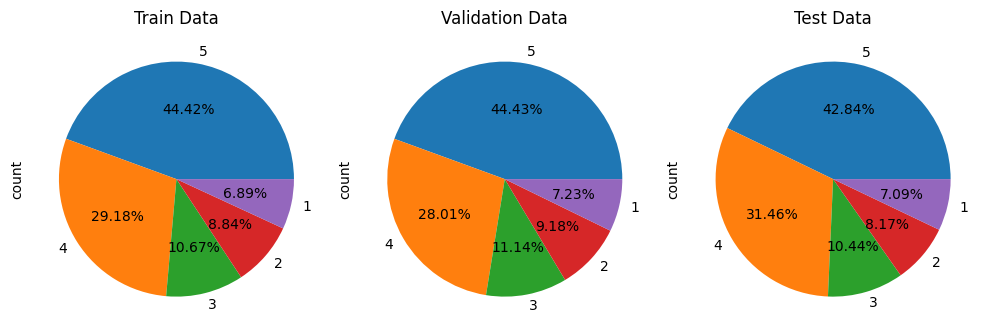

In [89]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
train_df["label"].value_counts().plot(kind="pie", autopct="%.2f%%")
plt.title("Train Data")

plt.subplot(1, 3, 2)
val_df["label"].value_counts().plot(kind="pie", autopct="%.2f%%")
plt.title("Validation Data")

plt.subplot(1, 3, 3)
test_df["label"].value_counts().plot(kind="pie", autopct="%.2f%%")
plt.title("Test Data")

plt.tight_layout()

### Resample train data

In [90]:
# Calculate total samples and target samples
total_samples = len(df)
targets = {
    5: int(0.30 * total_samples),
    4: int(0.25 * total_samples),
    3: int(0.20 * total_samples),
    2: int(0.15 * total_samples),
    1: int(0.10 * total_samples)
}

In [91]:
oversample_targets = {k: v for k, v in targets.items() if v > df['label'].value_counts()[k]}
undersample_targets = {k: v for k, v in targets.items() if v < df['label'].value_counts()[k]}

model_resampling = Pipeline([
    ('oversample', RandomOverSampler(sampling_strategy=oversample_targets)),
    ('undersample', RandomUnderSampler(sampling_strategy=undersample_targets))
])

In [92]:
X_resampled, y_resampled = model_resampling.fit_resample(df['text'].values.reshape(-1, 1), df['label'].values)

train_df = pd.DataFrame({
    "text": X_resampled.flatten(),
    "label": y_resampled
})

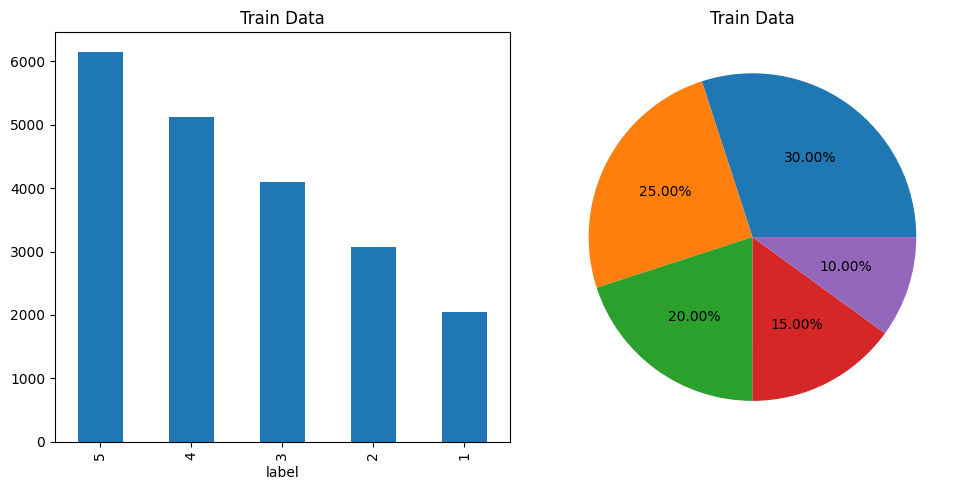

In [93]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
train_df["label"].value_counts().plot(kind="bar")
plt.title("Train Data")

plt.subplot(1, 2, 2)
plt.pie(train_df["label"].value_counts(), autopct="%.2f%%")
plt.title("Train Data")

plt.tight_layout()
plt.show()

In [94]:
train_df.to_csv(os.path.join("data", "train.csv"), index=False)
val_df.to_csv(os.path.join("data", "val.csv"), index=False)
test_df.to_csv(os.path.join("data", "test.csv"), index=False)